# PART 2

### Question 1 
Join the Titanic: Machine Learning From Disaster competition on Kaggle. Download and pre-
process the data.

We performed the following pre-processing steps:
- Concatenate train and test datasets for a consistent pre-processing on all data.
- Splitting the *Ticket* column in two columns to differentiate the alphabetic code and the number.
- Dropped a set of columns that convey non-useful information, such as the PassengerId or the name.
- Perform interpolation with the nearest method to deal with missing values.
- One hot encoding categorical features 

In [573]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('./h2data/train.csv')
df_test = pd.read_csv('./h2data/test.csv')

In [574]:
len_train = len(df_train)
df = pd.concat([df_train, df_test])

In [575]:
df['TicketNumber'] = df.apply(
    lambda x: int(x.Ticket.rsplit(' ')[-1]) or int(x.Ticket) if x.Ticket != "LINE" else -1,
    axis=1)

df['TicketCode'] = df.apply(
    lambda x: ''.join(filter(str.isalnum, x.Ticket.rsplit(' ')[0])) \
                      if len(x.Ticket.rsplit(' ')) > 1 else "NA",
    axis=1)


df.drop(columns = ["Cabin", "PassengerId", "Name", "Ticket", "TicketCode"], inplace=True)
df = df.interpolate("nearest")


df['Survived'] = df['Survived'].astype(int)

df = pd.get_dummies(df)

### Question 2
Implement logistic regression (it’s ok to use sklearn or similar software packages), try to predict
whether a passenger survived the disaster with your model. Choose the features (or combinations
of features) you would like to use or ignore, provided you justify your choice.

Using a heatmap, we visually selected features that are significantly correlated to the target *Survived*, while dropped the others or one for each pair of strongly intercorrelated features. For example, *Sex_female* and *Sex_male*, the two features resulting from the 1HE of the feature *Sex*, convey the same information as they are mutually exclusive hence oppositely correlated. Therefore, we dropped one of the two.  

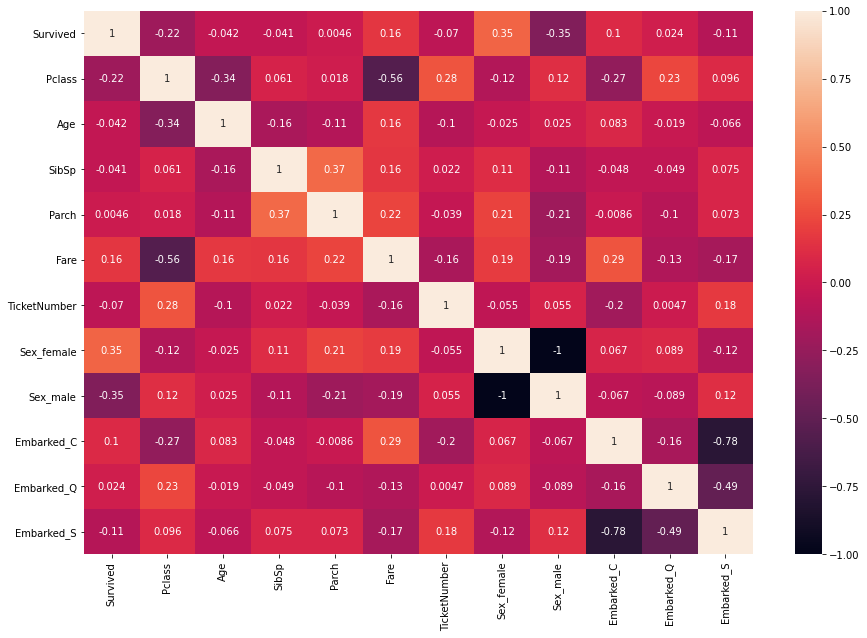

In [576]:
import seaborn as sn
cm = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(cm, ax=ax, annot=True)
plt.show()

In [577]:
df.drop(columns = ["Embarked_Q", "Parch", "SibSp", "Sex_male", "TicketNumber"], inplace=True)
df_train = df.iloc[:len_train, :]
df_test = df.iloc[len_train:, :]

In [578]:
Y = df_train["Survived"]
X = df_train.drop(columns = ["Survived"])

In [579]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=200)
logisticRegr.fit(X, Y)


LogisticRegression(max_iter=200)

In [580]:
score = logisticRegr.score(X, Y)
print(score)

0.7934904601571269


# Question 3
Train your classifier using all of the training data, and test it using the testing data. Submit your
results to Kaggle

#### Kaggle Score: 0.76076

In [581]:

predictions = logisticRegr.predict(df_test.drop(columns = ["Survived"]))

In [582]:
pred_df = pd.DataFrame(predictions, columns = ['Survived'])
pred_df.reset_index(inplace=True)
pred_df = pred_df.rename(columns = {'index':'PassengerId'})
pred_df["PassengerId"] = pred_df["PassengerId"].apply(lambda x : x + len(df_train) + 1)
pred_df.to_csv('results_h2.csv', sep=',', index=False)